# Приоритизация гипотез и Анализ A/B-теста

### Описание: 
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Цель:
1. Используя фреймворки ICE и RICE, приоритизировать гипотезы.
2. Проанализировать результаты A/B теста и принять решение о продолжении или остановке теста.

### Оглавление:
* [Шаг 1. Приоритизация гипотез](#first_step)
    - Вывод
* [Шаг 2. Анализ A/B-теста. Предобработка данных](#second_step)
    - Вывод
    * [Задачи](#second_1_prestep):
        - График кумулятивной выручки по группам.
        - График кумулятивного среднего чека по группам.
        - График относительного изменения кумулятивного среднего чека группы B к группе A.
        - График кумулятивной конверсии по группам. Сделайте выводы и предположения.
        - График относительного изменения кумулятивной конверсии группы B к группе A.
        - Точечный график количества заказов по пользователям.
        - Расчет 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
        - Точечный график стоимостей заказов.
        - Расчет 95-й и 99-й перцентили стоимости заказов.
        - Расчет статистической значимости различий в конверсии между группами по «сырым» данным.
        - Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
        - Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.
        - Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.
        - Принятие  решения по результатам теста и интерпретация его.
* [Шаг 3. Вывод](#third_step)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib
matplotlib.style.use('fivethirtyeight')
import seaborn as sns

### Часть 1. Приоритизация гипотез.  <a class="anchor" id="first_step"></a>

In [2]:
hypothesis = pd.read_csv(r'C:\Users\dshf\Desktop\portfolio\hypotheses_ABtest\data\hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

_Для приоритезации гипотез можно использовать несколько видов фреймворков. В данной работе это будет ICE и RICE, тк они пользуются наибольшей популярностью._

In [4]:
#расчет ICE
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis_ice = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis_ice

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


По результатам применения ICE на первом месте гипотеза 'Запустить акцию, дающую скидку на товар в день рождения', второе - 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей', третье - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. Видно, что первая гипотеза имеет отличные показатели в Impact и Confidence, средние в Efforts, но Reach всего лишь 1, но тк это Reach не учитывается, то это позволяет встать на первое место.

In [5]:
#расчет RICE
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis_rice = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis_melted = hypothesis_rice.melt('Hypothesis', value_vars=['ICE', 'RICE'])
hypothesis_melted

,Hypothesis,variable,value
0,Добавить форму подписки на все основные страни...,ICE,11.200000
1,Добавить блоки рекомендаций товаров на сайт ин...,ICE,7.000000
2,"Добавить два новых канала привлечения трафика,...",ICE,13.333333
3,Показать на главной странице баннеры с актуаль...,ICE,8.000000
4,"Запустить акцию, дающую скидку на товар в день...",ICE,16.200000
5,"Изменить структура категорий, что увеличит кон...",ICE,1.125000
6,"Запустить собственную службу доставки, что сок...",ICE,2.000000
7,"Добавить страницу отзывов клиентов о магазине,...",ICE,1.333333
8,"Изменить цвет фона главной страницы, чтобы уве...",ICE,1.000000
9,Добавить форму подписки на все основные страни...,RICE,112.000000


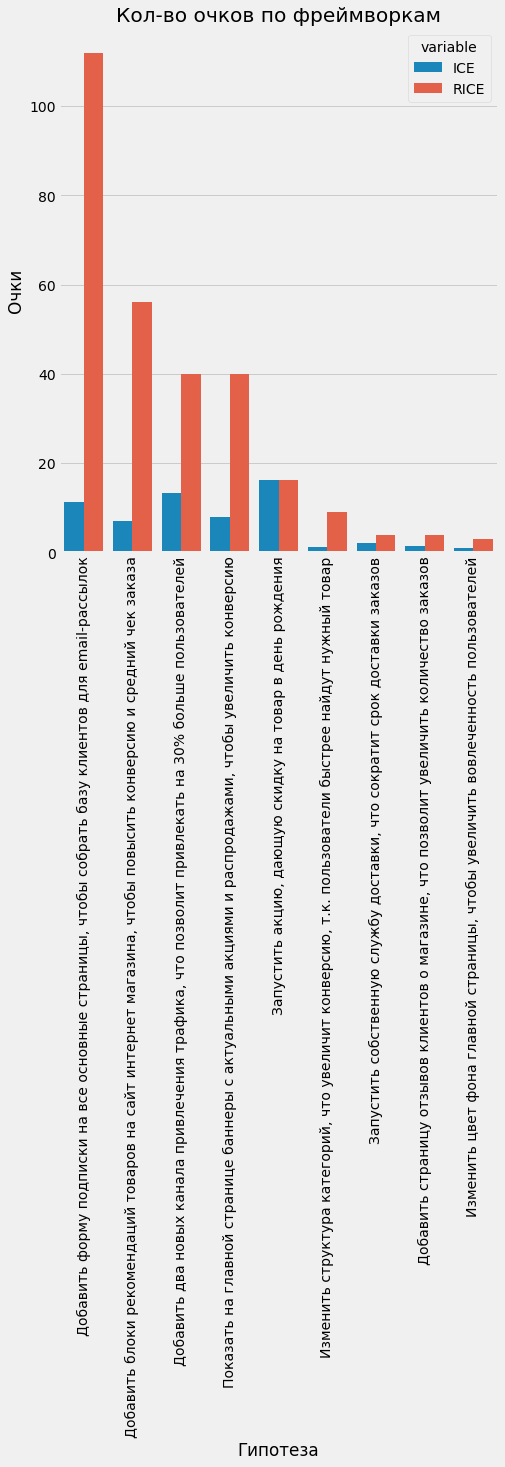

In [6]:
plt.figure(figsize=(7,9))
sns.barplot(data = hypothesis_melted, y='value', x = 'Hypothesis', hue='variable')
plt.xticks(rotation=90)
plt.xlabel('Гипотеза')
plt.ylabel('Очки')
plt.title('Кол-во очков по фреймворкам')
plt.show()

### Вывод: 
Во фреймворке ICE не учитывался охват по пользователям и тогда в топе были 'Запустить акцию, дающую скидку на товар в день рождения', 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' и 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' с оценкой охвата 1 и 3 и только у последней 10(который и имеет самый высокий RICE). У воторой гипотезы ('Добавить два новых канала привлечения трафика') самое сильное влияние, но очень низкий охват и самый высокий efforts из этой группы, который сильно влияет на конечную цифру. 
Вывод: третья гипотеза в ICE, имеющая показатели выше среднего в Impact и Confidence имела только 3ю позитицию, тк не учитывался охват, но как только добавили Reach в систему расчета, то она встала на первую позицию во фреймворке RICE и это говорит о том, что гипотезу 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' стоит проверить в первую очередь, тк она имеет наилучшие показатели.

### Часть 2. Анализ A/B-теста  <a class="anchor" id="second_step"></a>

In [7]:
orders = pd.read_csv(r'C:\Users\dshf\Desktop\portfolio\hypotheses_ABtest\data\orders.csv')
visitors = pd.read_csv(r'C:\Users\dshf\Desktop\portfolio\hypotheses_ABtest\data\visitors.csv')

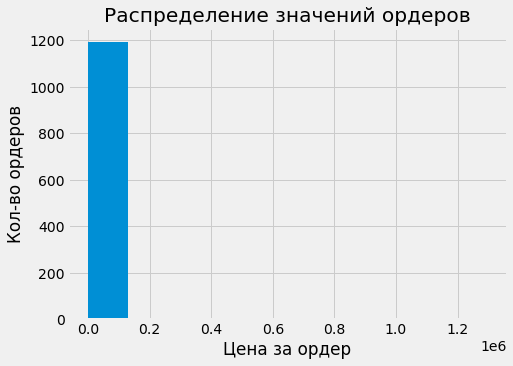

In [8]:
plt.figure(figsize=(7,5))
plt.hist(orders['revenue'])
plt.title('Распределение значений ордеров')
plt.xlabel('Цена за ордер')
plt.ylabel('Кол-во ордеров')
plt.show()

In [9]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

_На гистограмме видно, что большинство значений находятся в диапазоне до 110000, но есть еще какие то выбросы в районе 1200000._

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


_Необходимо поменять у даты тип данных с object на datetime. И посмотреть нет ли заглушек типа tbd_

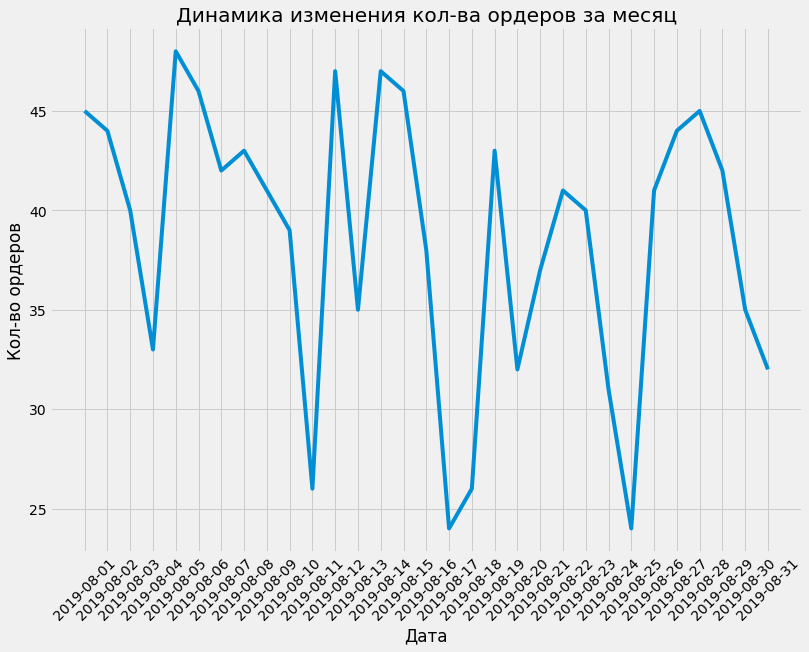

In [12]:
dayly_change = orders.groupby('date')['transactionId'].count().reset_index()
plt.figure(figsize=(12,9))
sns.lineplot(data=dayly_change, x='date', y='transactionId')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кол-во ордеров')
plt.title('Динамика изменения кол-ва ордеров за месяц')
plt.show()

_На графике видны провалы через каждые 7 дней._

In [13]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

_Распределение ордеров по группам_

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


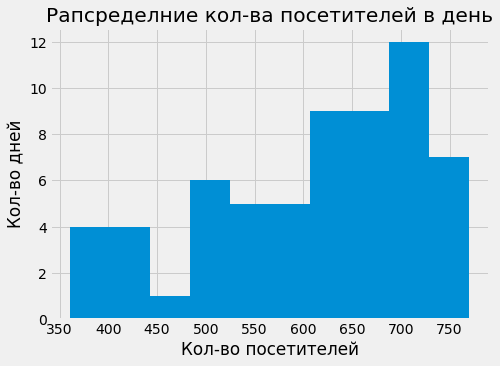

In [15]:
plt.figure(figsize=(7,5))
plt.hist(visitors['visitors'])
plt.title('Рапсределние кол-ва посетителей в день')
plt.xlabel('Кол-во посетителей')
plt.ylabel('Кол-во дней')
plt.show()

_Распределние по суточному трафику выглядит гораздо лучше чем 'Распределение значений ордеров'._

In [16]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

In [17]:
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [18]:
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


_Дубликатов по строкам не обнаружено_

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


_Стандартная проблема с датой. Меняем тип на datetime_

In [20]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Вывод :
В ходе предобработки данных были исправлен тип данных в orders и visitors в столбцах с датами со строчного типа на date. Так же данные были проверены на предмет дубликатов стров(не обнаружено). Гистограмма распределения по значениями ордеров показал аномальные выбросы в райне 1200000, а гистограмма по суточным посетителям показал рапределение, напоминающее нормальное. Так же датасеты были проверены на заглушки типа tbd(не обнаружено). Так же нет пропущенных значений в данных.

### Задачи <a class="anchor" id="second_1_prestep"></a>

#### 1. Построение графика кумулятивной выручки по группам.

Сделаем датасет с уникальными датами продаж по группам

In [21]:
dateUnique = orders[['date', 'group']].drop_duplicates()

In [22]:
dateUnique.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Создаем лямбу функцию, которая будет проходить по данным из orders и сранивать с dateUnique, если дата меньше или равна дате из dateUnique, то revenue суммируется и так по каждой строке из dateUnique. Так же с transactionId и visitorId. Тем самым находим кумулятывные значение по дням. В первый день - значение только за первый, во второй - значение первого дня + значение второго дня и т.д.

In [23]:
ordersAggregated = dateUnique.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionId':'nunique', 'visitorId':'nunique'}), axis=1)\
.sort_values(by=['date','group'])

In [24]:
ordersAggregated.tail(7)

,date,group,revenue,transactionId,visitorId
305,2019-08-28,B,5328268,576,526
497,2019-08-29,A,3936510,534,484
496,2019-08-29,B,5559398,596,544
730,2019-08-30,A,4022970,545,493
690,2019-08-30,B,5774631,620,567
958,2019-08-31,A,4084803,557,503
930,2019-08-31,B,5907760,640,586


_Есть проблема с данными по посетителям. Тк нет детальных данных с id пользователя по посетителям, а только общее кол-во посетителей в день(возможно не уникальных и они повторяются изо дня в день), то приходится брать то, что имеет и просто считаем кумулятивную сумму посетителей по дням. Методом такой же, как в предидущем вычислении._

In [25]:
visitorsAggregated = dateUnique.apply(lambda x: visitors[np.logical_and\
                                                         (visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

_Теперь есть два датасета с кумулятивными значениями по с покупками и посещениями. Остается их объеденить в один и исследовать._

In [26]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.head(5)

,date,group,revenue,transactionId,visitorId,visitors
0,2019-08-01,A,148579,24,20,719
1,2019-08-01,B,101217,21,20,713
2,2019-08-02,A,242401,44,38,1338
3,2019-08-02,B,266748,45,43,1294
4,2019-08-03,A,354874,68,62,1845


In [27]:
cumulativeData.columns = ['date', 'group', 'revenue', 'cumTransactions', 'cumBuyers', 'cumVisitors']

In [28]:
cumulativeData.head(5)

,date,group,revenue,cumTransactions,cumBuyers,cumVisitors
0,2019-08-01,A,148579,24,20,719
1,2019-08-01,B,101217,21,20,713
2,2019-08-02,A,242401,44,38,1338
3,2019-08-02,B,266748,45,43,1294
4,2019-08-03,A,354874,68,62,1845


_Можно разбить на группы(А,В) и сохранить в отдельные датасеты. Это позволит построить график кумулятивной выручки по группам._

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'cumTransactions']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'cumTransactions']]

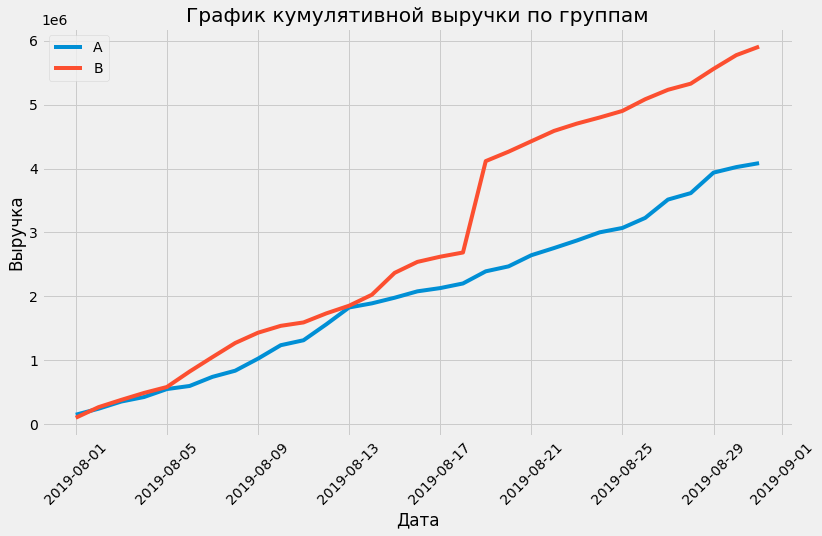

In [30]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.xticks(rotation=45)
plt.show()


На графике видно, что первые 5 дней выручка по группам была идентична, затем группа Б стала немного опережать группу А, но через 2 недели значения сровнялись. Уже через 16 дней группа Б снова вырвалась вперед, но уже более земетней и примерно в 20 числах виднен резкий аномальный рост, который говорит, что был какой то аномальный ордер(возможно несколько) и далее группа Б имеет уже существенное преимущество над А(возможно из этих аномальных ордеров) и выигрывает у группы А.

#### 2. График кумулятивного среднего чека по группам.

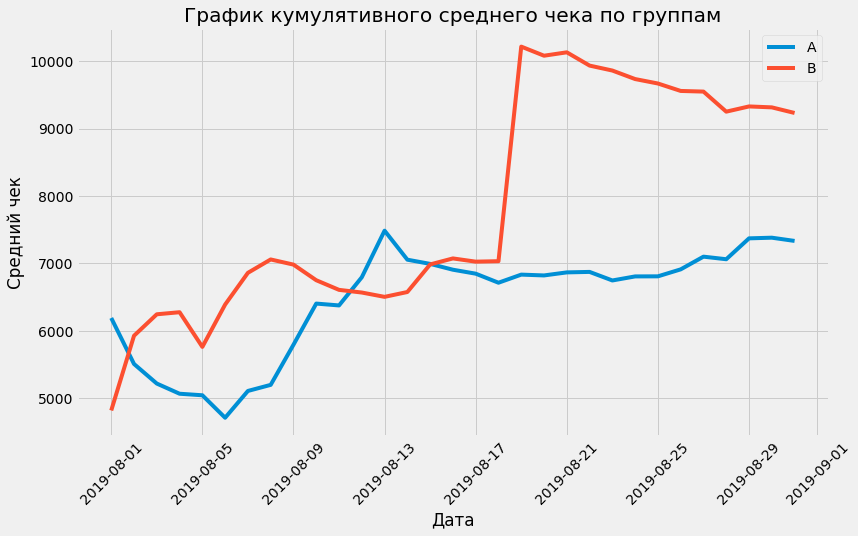

In [31]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['cumTransactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['cumTransactions'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.xticks(rotation=45)
plt.show()


График среднего чека более пилообразный. Выше начала группа А, но уже через пару дней ситуация изменилась и группа Б стала лидировать. Вначале теста видны сильные колебания, это говорит о небольшом кол-ве данных. Группа А стабилизирует свои значения уже примерно через 20 дней и график достаточно спокойный. В конце есть небольшая тенденция роста, но выглядит достаточно натурально(без аномалий). Группа Б показывает резкий всплекс среднего чека в 20х числах(с 7000 до 10000) и после стабильное падение.

#### 3. График относительного изменения кумулятивного среднего чека группы B к группе A

Используя команду merge, соединяем датасеты с кумулятивной выручкой группы А и В, чтобы посчитать относительное изменение кумулятивного среднего чека группы B к группе A.

In [32]:
mergedCumRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, suffixes=['A', 'B'], on='date')
mergedCumRevenue.head()

,date,revenueA,cumTransactionsA,revenueB,cumTransactionsB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


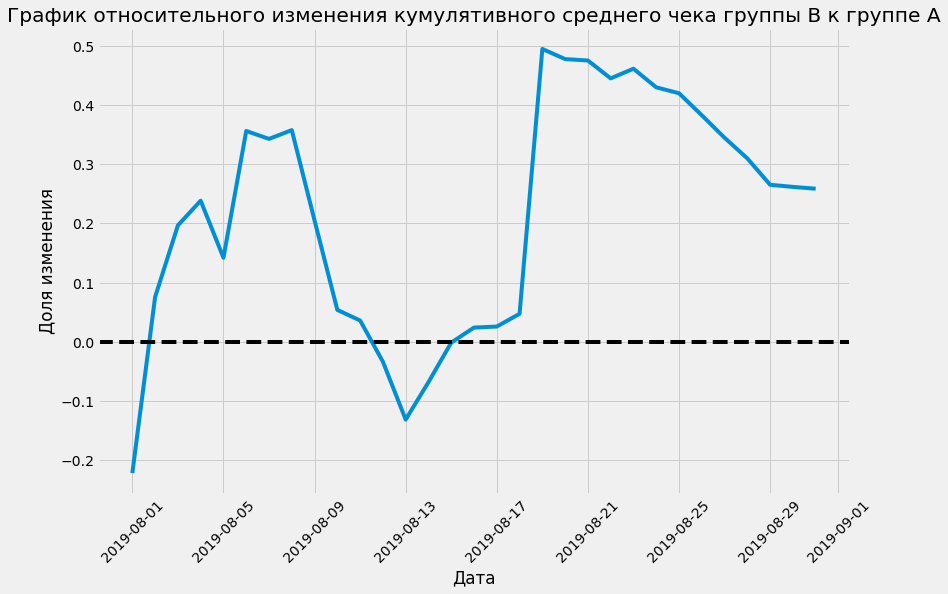

In [33]:
plt.figure(figsize=(12,8))
plt.plot(mergedCumRevenue['date'], (mergedCumRevenue['revenueB'] /\
    mergedCumRevenue['cumTransactionsB']) / (mergedCumRevenue['revenueA']  / mergedCumRevenue['cumTransactionsA']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Из отрицательного значения в первые дни кривая начинает рости и к 8-9 дню рост достигает в пости 40%, но потом начинается спад и кривая уходит в отрицательные значения(-12%), затем снова постепенный рост и в 20х числах виден выброс, которые увеличивает долю с 0.05 к 0.5 и после резкого роста кривая снова падает, это говорит о том, что она снова тянется к среднему и со временем данный выброс будет иметь все меньше влияние на график, но на данном графике пока нельзя сказать, что кривая стабилизировалась и встала на среднее значение. Возможно исключив выбросы, можно будет сделать какой то вывод.

#### 4.График кумулятивной конверсии по группам

Для расчет конверсии необходимо поделить кол-во покупателей на кол-во посетителей. Так же и с кумулятивной конверсией.

In [34]:
cumulativeData['conversion'] = cumulativeData['cumBuyers'] / cumulativeData['cumVisitors']

In [35]:
#Создаем датасеты по группам.
cumulativeCumConversionA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'conversion']]
cumulativeCumConversionB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'conversion']]

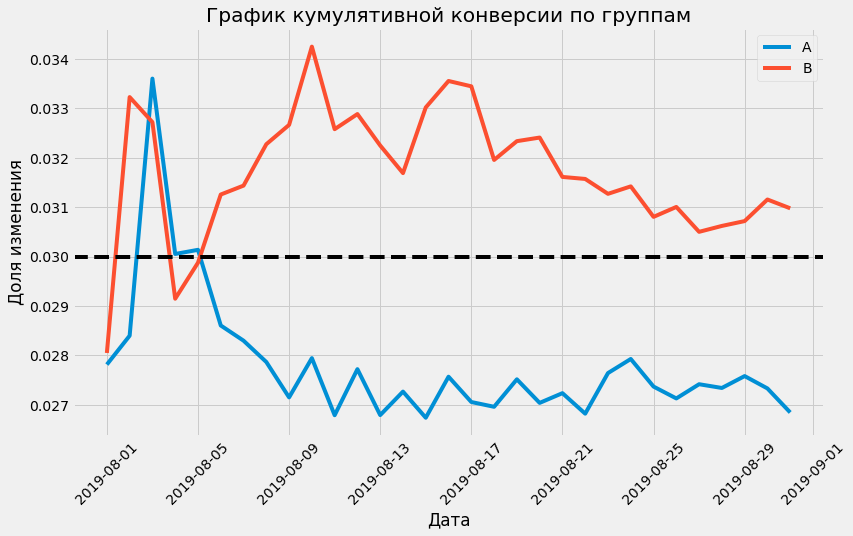

In [36]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeCumConversionA['date'], cumulativeCumConversionA['conversion'], label='A')
plt.plot(cumulativeCumConversionB['date'], cumulativeCumConversionB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Доля изменения')
plt.axhline(y=0.03, color='black', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.show()

В начале исследования конверсия имеет резкие скачки скорее всего это связано с небольшим кол-вом данных. Примерно к 5 дню пути кривых расходятся и уже не пересекаются. Конверсия группы В выше чем А и показывает стабильность превосходства. Группа А в конце исследования находится в диапазон 0.027-0.028, а група В в значениях около 0.031.

#### 5. График относительного изменения кумулятивной конверсии группы B к группе A

Так же соединим датасеты с кумулятивной конверсией групп А и В.

In [37]:
mergedCumConversion = cumulativeCumConversionA.merge(cumulativeCumConversionB, on='date', suffixes=['A', 'B'])
mergedCumConversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.027816,0.028050
1,2019-08-02,0.028401,0.033230
2,2019-08-03,0.033604,0.032723
3,2019-08-04,0.030055,0.029149
4,2019-08-05,0.030139,0.029878


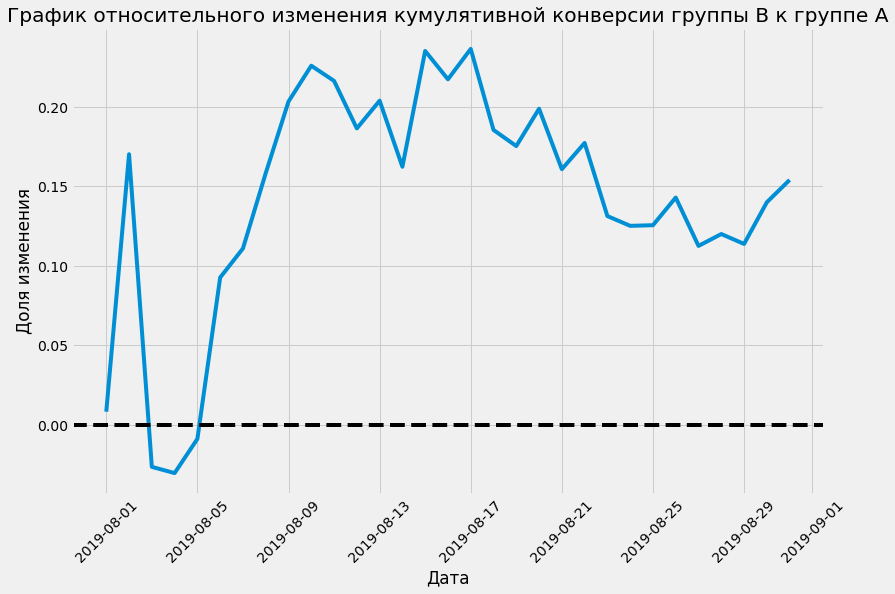

In [38]:
plt.figure(figsize=(12,8))
plt.plot(mergedCumConversion['date'], (mergedCumConversion['conversionB'] / mergedCumConversion['conversionA']) - 1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля изменения')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Резкие изменения вначале опыта из за малого кол-ва данных, примерно через 10 дней график принимает более стабильный вид. Относительная конферсия показывает тенденцию плавного падения и примерно к 0.10-0.15 немного стабилизируется. В любом случае данный график также показывает, что конверсия группы В выше, чем А. Но на этот график могут повлиять покупатели, которые сделали огромное кол-во заказов. Необходмо это проверить.

#### 6. Точечный график количества заказов по пользователям

Сгруппируем данные по уникальному пользователю и кол-ву его уникальных заказов по группам.

In [39]:
ordersByUsers  = orders.groupby('visitorId').agg({'transactionId':'nunique', 'group':'max'})\
.reset_index()
ordersByUsers.columns = ['visitorId', 'orders', 'group']

Данный способ нахождения длины датасета уникальных покупателей показан в тренжере, но я подумал и нашел другой. Через ordersByUsers.index + 1. Это должно сработать, тк в ordersByUsers индексы сброшены, но начинаются с 0 и мы добавляем 1.

In [40]:
x_values = pd.Series(range(len(ordersByUsers)))

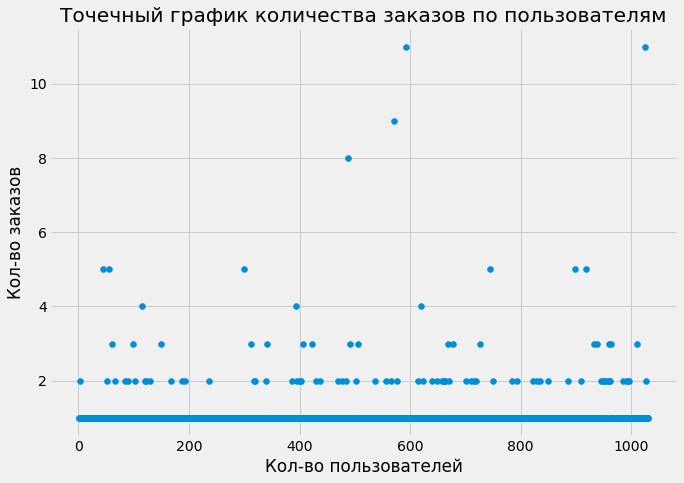

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(ordersByUsers.index + 1, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.show()

На графике видно, что абсолютное большинство делают 1 закан, но достаточно много людей делают 2 заказа. Есть так же люди, которые делают больше 10 заказов. Необходимо определить после какого кол-ва заказов, значени можно считать аномальным. Глядя на график я бы сказал, что после 3 заказов.

#### 7. Подсчет 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

Библиотека numpy позволяет посчитать заданный перцентиль.

In [42]:
np.percentile(ordersByUsers['orders'], [95, 97, 99])

array([2., 2., 4.])

Я решил взять 97%. В теории говорится, что самое распространенное отсечение данных это от 1% до 5%. 97 % пользователей имеют не больше 2х заказов.

In [43]:
manyOrders = ordersByUsers[ordersByUsers['orders'] > 2]['visitorId']

#### 8. Точечный график стоимостей заказов

In [44]:
x_values = pd.Series(range(0, len(orders['revenue'])))

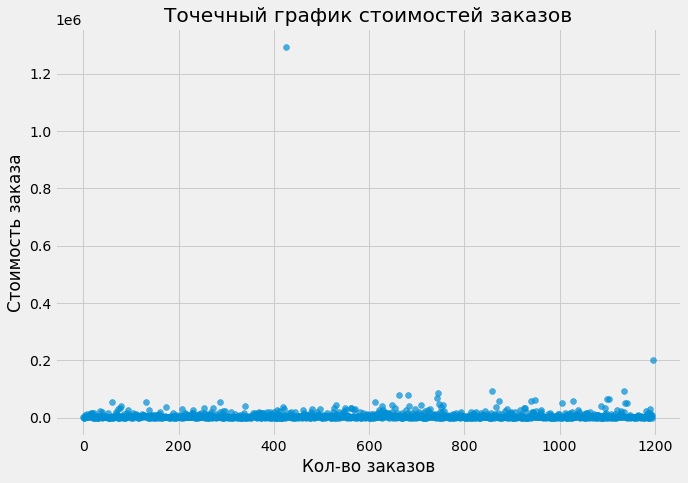

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(x_values, orders['revenue'], alpha=0.7)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость заказа')
plt.show()

_График показывает аномальное значени более 1200000, так же есть аномалии в районе 200000, но две ли их всего на графике сложно понять. Лучше посмотреть через перцентили._

#### 9. Подсчет 95-го и 99-го перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [46]:
np.percentile(orders['revenue'], [95, 97, 99])

array([28000. , 35485. , 58233.2])

_Беру 97 перцентиль со значением 36000. Все что выше-аномальное значение._

In [47]:
expensiveOrders = orders[orders['revenue'] > 36000]['visitorId']

_Имеет два датасета с аномальными id пользователей expensiveOrders и manyOrders, для простоты объединяем их методом concat и удаляем повторяющиеся id._

In [48]:
abnormalUsers = pd.concat([manyOrders, expensiveOrders]).drop_duplicates()

In [49]:
print('Кол-во пользователей, имещих аномальные значения:', abnormalUsers.shape[0])

Кол-во пользователей, имещих аномальные значения: 60


#### 10. Статистическая значимость различий в конверсии между группами по «сырым» данным.

В visitors есть данные с ежедневным кол-вом посетителей. В orders есть кол-во заказов. Для применение критерия Манна Уитни необходимо 2 датасета(группа А и группа В), в которые будет кол-во заказов каждого посетителя. Для этого создаем датасет с длиной в кол-во посетителей по группам минус кол-во покупателей по группам и заполняем нулями, тк эти посетители ничего не купили.

In [50]:
visitorsGroupA_zero = pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() \
                                                   - len(ordersByUsers[ordersByUsers['group'] == 'A'])), name='orders')

In [51]:
visitorsGroupB_zero = pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() \
                                                   - len(ordersByUsers[ordersByUsers['group'] == 'B'])), name='orders')

_Разделение трафика считается хорошим, если различие в размере датасета по группам меньше 1%_

In [52]:
print('Относительная разница размеров групп по распределению трафика:', \
      abs(visitorsGroupA_zero.shape[0] / visitorsGroupB_zero.shape[0] - 1 ))

Относительная разница размеров групп по распределению трафика: 0.0021276595744680327


In [53]:
ordersGroupA = ordersByUsers[ordersByUsers['group'] == 'A']['orders']
ordersGroupB = ordersByUsers[ordersByUsers['group'] == 'B']['orders']

_Добавляем к датасетам с нулями датасет с кол-вом заказов по группам._

In [54]:
SampleA = pd.concat([ordersGroupA, visitorsGroupA_zero], axis=0)
SampleB = pd.concat([ordersGroupB, visitorsGroupB_zero], axis=0)

In [55]:
SampleA.sample(10)

2252     0
727      0
13159    0
11763    0
12565    0
15501    0
3395     0
5747     0
12193    0
15958    0
Name: orders, dtype: int64

**Формулировка гипотез.**

Пусть H0 - в датасетах нет значимых различий и конверсии между группами равны, тогда H1 - в датасетах имеются значимые различия и конверсии между группами не равны.

In [56]:
alpha=0.05
result = st.mannwhitneyu(SampleA, SampleB)[1]
print("p-value: {0:.7f}".format(result))
print("Относительная разница конверсии В от А: {0:.3f}".format(SampleB.mean()/SampleA.mean()-1))
if result < alpha:
    print('Нулевая гипотеза отергнута. В данном наблюдении в датасетах имеются значимые различия и конверсии между группами не равны')
else: 
    print('Нулевая гипотеза подтверждена. В данном наблюдении в датасетах нет значимых различий и конверсии между группами равны.')

p-value: 0.0000073
Относительная разница конверсии В от А: 0.543
Нулевая гипотеза отергнута. В данном наблюдении в датасетах имеются значимые различия и конверсии между группами не равны


Нулевая гипотез отвергнута и значимые различия имеются. p-value очень маленький и это говорит о существенных отличиях. Данный тест не параметрический, поэтому выбросы на него несильно влияют. Конверсия же нам говорит, что относительные изменения по сырым данным в конверсии около 54%(группа В лучше группы А на 54%) и это довольно существенно.

#### 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Формулировка гипотез.**

Пусть H0 - в датасетах нет значимых различий и средние чеки между группами равны, тогда H1 - в датасетах имеются значимые различия и средние чеки между группами не равны.

In [57]:
alpha=0.05
result = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
print("p-value: {0:.3f}".format(result))
print("Относительная разница в среднем чеке В от А: {0:.3f}".format((orders[orders['group'] == 'B']['revenue'].mean() /\
                                                                     orders[orders['group'] == 'A']['revenue'].mean()) - 1))
if result < alpha:
    print('Нулевая гипотеза отергнута. В данном наблюдении имеются значимые различия и средние чеки между группами не равны')
else: 
    print('Нулевая гипотеза подтверждена. В данном наблюдении нет значимых различий и средние чеки между группами равны.')

p-value: 0.365
Относительная разница в среднем чеке В от А: 0.259
Нулевая гипотеза подтверждена. В данном наблюдении нет значимых различий и средние чеки между группами равны.


Если различия в конверсии существенные и их сложно отрицать, то различия в среднем чеке, наоборот, для теста показались незначительными. P-value равен 0.365 и это намного больше уровня статистической значимости 0.05. Но вот если сравнивать относилтельные средние значения В от А, то можно увидеть, что средний чек у В выше на 26% среднего чека в А, но скорее всего это из за выбросов, но тест не обманешь)

#### 12. Статистическая значимость различий в конверсии между группами по «очищенным» данным

Необходимо удалить из orders аномальные id пользователей. А далее все действия, которые мы уже делали ранее.

In [58]:
ordersByUsersFiltred = ordersByUsers[np.logical_not(ordersByUsers['visitorId'].isin(abnormalUsers))]

In [59]:
visitorsFiltredGroupA_zero = pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() \
                                                   - len(ordersByUsersFiltred[ordersByUsersFiltred['group'] == 'A'])), name='orders')
visitorsFiltredGroupB_zero = pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() \
                                                   - len(ordersByUsersFiltred[ordersByUsersFiltred['group'] == 'B'])), name='orders')

In [60]:
ordersFiltredGroupA = ordersByUsersFiltred[ordersByUsersFiltred['group'] == 'A']['orders']
ordersFiltredGroupB = ordersByUsersFiltred[ordersByUsersFiltred['group'] == 'B']['orders']

In [61]:
FiltredSampleA = pd.concat([ordersFiltredGroupA, visitorsFiltredGroupA_zero], axis=0)
FiltredSampleB = pd.concat([ordersFiltredGroupB, visitorsFiltredGroupB_zero], axis=0)

**Формулировка гипотез.**

Пусть H0 - в датасетах нет значимых различий и конверсии между группами равны, тогда H1 - в датасетах имеются значимые различия и конверсии между группами не равны.

In [62]:
alpha=0.05
result = st.mannwhitneyu(FiltredSampleA, FiltredSampleB)[1]
print("p-valiue: {0:.7f}".format(result))
print("Относительная разница в конверсии В от А по очищенным данным: {0:.3f}"\
      .format(FiltredSampleB.mean()/FiltredSampleA.mean()-1))
if result < alpha:
    print('Нулевая гипотеза отергнута. В данном наблюдении имеются значимые различия и конверсии между группами не равны.')
else: 
    print('Нулевая гипотеза подтверждена. В данном наблюдении нет значимых различий и конверсии между группами равны.')

p-valiue: 0.0000912
Относительная разница в конверсии В от А по очищенным данным: 0.341
Нулевая гипотеза отергнута. В данном наблюдении имеются значимые различия и конверсии между группами не равны.


Убрав аномальные значения тест только дал уверенности, что различия в конверсии есть и относительная отличие составляет 34%(В над А). Группа В точно выигрывает в конверсии и выигрыш достаточно существенный(34%).

#### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [63]:
FiltredForBillsA = orders[np.logical_and(np.logical_not(orders['visitorId'].isin(abnormalUsers)), orders['group'] == 'A')]
FiltredForBillsB = orders[np.logical_and(np.logical_not(orders['visitorId'].isin(abnormalUsers)), orders['group'] == 'B')]

Формулировка гипотез. Пусть H0 - в датасетах нет значимых различий и средние чеки между группами равны, тогда H1 - в датасетах имеются значимые различия и средние чеки между группами не равны.

In [64]:
alpha=0.05
result = st.mannwhitneyu(FiltredForBillsA['revenue'], FiltredForBillsB['revenue'])[1]
print("p-valiue: {0:.3f}".format(result))
print("Относительная разница в среднем чеке В от А по очищенным данным: {0:.3f}"\
      .format(FiltredForBillsB['revenue'].mean() / FiltredForBillsA['revenue'].mean() - 1))
if result < alpha:
    print('Нулевая гипотеза отергнута. В данном наблюдении имеются значимые различия и средние чеки между группами не равны')
else: 
    print('Нулевая гипотеза подтверждена. В данном наблюдении нет значимых различий и средние чеки между группами равны')

p-valiue: 0.471
Относительная разница в среднем чеке В от А по очищенным данным: 0.027
Нулевая гипотеза подтверждена. В данном наблюдении нет значимых различий и средние чеки между группами равны


В ходе теста снова удостоверились в предидущем выводе, что средние чеки в двух группах ощутимых различий не имеют и Относительная разница в среднем чеке В от А упала с 26%(по сырым данным) до 2.7%(по очищенным данным).

#### 14. Решение по результатам теста.

В данной работе мы наблюдаем заметный прирост по конверсии в группе В, что касается среднего чека, то он остается таким же. Значительный выброс, который мы видим на графике среднего чека заставляет задуматься над тем, надо ли продолжать тест дальше или остановить и объявить победителя. Важный момент в том, что благодаря тесту Манна Уитни между средними чеками по группам мы определили, что различий в них нет(ни в сырых данным, ни в очищенных) и поэтому данная метрика уходит на второй план и на нее нет смысла ориентироваться. Главный результат, на который стоит обращать внимание это конверсия и стоит посмотреть на графики конверсии, если там есть существенные колебания в последние дни и сложно разобрать у кого показатели выше, то тест стоит продолжить, но в нашем случае в борьбе по конверсии побеждает группа В. Останавливаем тест и объявлем победителя группа В.

<a class="anchor" id="second_step"></a>

### Шаг 3. Вывод:  <a class="anchor" id="third_step"></a>

Проведя данную работу, были решены две основные задачи. Первая - используя фреймворки ICE, RICE была решена задача с приоритизацией гипотез. По итогам данного исследования были выделены лидеры, с которых стоит начинать AB тестирования, а так же были определены малозначимые гипотезы. Вторая задача - анализ бизнес показателей( конверсия, средний чек). В ходе проработки данной задачи было решено сравнить показатели по сырым данным и чистым и увидеть на сколько существенна разница при применении непараметрического критерия Манна Уитни. Критерий показал себя с положительной стороны и скорее всего при использовании например того критерия Стьюдента мы бы пришли к неправильным выводам(к тому же он позволяет проводить тест на данных с нормальным распределением). Например, тест Манна Уитни показывал, что разницы в среднем чеке нет, но если сравнивать относительное различие средних чеков Б от А, то получалось около 26%, на чистых данных - 2,7%. Это говорит о том, парамаетрические критерии в данном случае скорее всего показали бы неправильный результат. 